### Ejercicio 1
Una empresa en Lima que fabrica producto de consumo masivo posee 3 plantas de produccion A, B, C y 5 sitios de consumo T1, T2, T3, T4 y T5. Su produccion por planta y los sitios de consumo respectivos, se muestran en las siguientes tablas:

- Sitios de produccion: A (5), B(4), C(7)
- Sitios de consumo: T1(3), T2(4), T3(5), T4(2), T5(1)

Finalmente cada sition solo puede servir a los siguientes:
- A: T1, T3
- B: T2, T4
- C: T3, T4, T5

El problema consiste en satisfacer los sistios de consumo, logrando enviar la mayor cantidad de productos de consumo masivo desde sus tres plantas de produccion a todos los sitios de consumo.

In [ ]:
#@title nodes
%%file g.al
1 5 2 4 3 7
4 3 6 5
5 4 7 2
6 5 7 2 8 1
9 3
9 4
9 5
9 2
9 1
-

Overwriting g.al


In [ ]:
#@title dibujado
import graphviz as gv
def loadGraphAL(fn):
  with open(fn) as f:
    G = []
    for line in f:
      if line == '-\n':
        G.append([])
      else:
        nums = [int(x) for x in line.split()]
        G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])
    return G
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp", defaultcolor="gray"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = defaultcolor
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [ ]:
#@title ejercicio1
import math
import numpy as np
# Practicamente son 3 grafos
# Primero intentar llenar los que no tienes
def dfs(G, u, t, visited):
    visited[u] = True
    if u == t:
        return [u], math.inf
    else:
        n = len(G)
        for v in range(n):
            if G[u, v] > 0 and not visited[v]:
                path, mid = dfs(G, v, t, visited)
                if path != None:
                    return [u] + path, mid if mid < G[u, v] else G[u, v]
        return None, 0

def fordFulkerson(G, s, t):
    n = len(G)
    Gres = np.zeros((n, n))
    for u in range(n):
        for v, w in G[u]:
            Gres[u, v] = w
    Gflow = np.zeros((n, n))
    while True:
        path, bottleneck = dfs(Gres, s, t, [False]*n)

        if path != None:
            for i in range(1, len(path)):
                u = path[i - 1]
                v = path[i]
                Gres[u, v] -= bottleneck
                Gres[v, u] += bottleneck
                Gflow[u, v] = Gflow[u, v] + bottleneck
        else:
            break

    return Gflow, np.sum(Gflow[s])

In [ ]:
G = loadGraphAL("g.al")

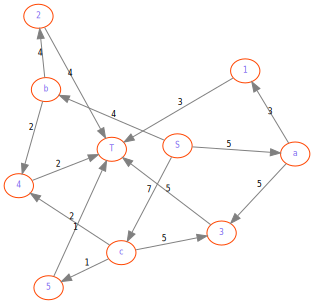

In [ ]:
#adjlShow(G, "Sabc12345T", directed=True, weighted=True, layout="neato")
adjlShow(G, "Sabc12345T", directed=True, weighted=True, layout="sfdp")

In [ ]:
Gres, mf = fordFulkerson(G, 0, 9)
n = len(Gres)
G2 = [[(v, Gres[u, v]) for v in range(n) if Gres[u, v] > 0] for u in range(n)]
G2

[[(1, 5.0), (2, 4.0), (3, 6.0)],
 [(4, 3.0), (6, 2.0)],
 [(5, 4.0)],
 [(6, 3.0), (7, 2.0), (8, 1.0)],
 [(9, 3.0)],
 [(9, 4.0)],
 [(9, 5.0)],
 [(9, 2.0)],
 [(9, 1.0)],
 []]

Flujo máximo: 15.0


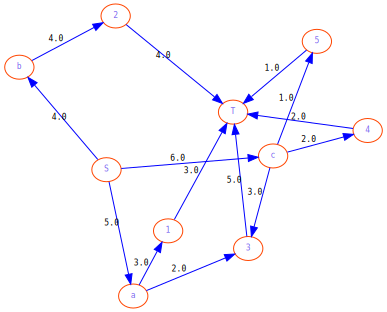

In [ ]:
print("Flujo máximo:", mf)
#adjlShow(G2, "Sabc12345T", directed=True, weighted=True, layout="neato", defaultcolor="blue")
adjlShow(G2, "Sabc12345T", directed=True, weighted=True, layout="sfdp", defaultcolor="blue")

### Ejercicio 2


In [ ]:
#@title Clase grafo y disjointset
import heapq
import math
from collections import defaultdict
class DisjointSet:
    def __init__(self, n):
        self.rank = [0] * n
        self.parent = [i for i in range(n)]
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        
        return self.parent[x]
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        
        if xroot == yroot:
            return
        
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1
class Graph():
    def __init__(self, V):
        self.V = V
        self.graph = defaultdict(list)
    
    def fromList(self, L):
        V = len(L)
        for u, e in enumerate(L):
              for v, w in e:
                 self.addEdge(u, v, w)
    def getList(self):
      result = []
      for key, values in sorted(self.graph.items()):
        temp_set = set()
        for pair in values:
            temp_set.add((pair[0], pair[1]))
        temp_list = list(temp_set)
        result.append(temp_list)
      return result

    def addEdge(self, src, dest, weight):
        newNode = [dest, weight]
        self.graph[src].insert(0, newNode)
        newNode = [src, weight]
        self.graph[dest].insert(0, newNode)

    def PrimMST(self, start = 0):
        V = self.V 
        visited = [False] * V
        key = [float("inf")] * V
        parent = [-1] * V
        minHeap = []

        key[start] = 0
        heapq.heappush(minHeap, (key[start], start))
        while minHeap:
            _, u = heapq.heappop(minHeap)
            if visited[u]: continue
            visited[u] = True
            for v, weight in self.graph[u]:
                if not visited[v] and weight < key[v]:
                    key[v] = weight
                    parent[v] = u
                    heapq.heappush(minHeap, (weight, v))
        cost = 0
        for i in range(1, V):
          #print("% d - % d" % (parent[i], i))
          print("%d - %d: %d" % (parent[i], i, key[i]))
          cost += key[i]
        print("Costo total del MST para el grafo: ", cost)
        return parent
    
    def KruskalMST(self):
        n = self.V
        ds = DisjointSet(n)
        edges = [(w, u, v) for u in range(n) for v, w in self.graph[u]]
        edges.sort()
        mst = []
        result = []
        links = 0

        for w, u, v in edges:
            if ds.find(u) != ds.find(v):
                ds.union(u, v)
                result.append((u, v, w))
                mst.append((u, v))
                links += 1
            if links == n - 1:
                break
        tot_weight = 0
        for u, v, weight in result:
            tot_weight += weight
            print("%d - %d: %d" % (u, v, weight))

        print("Costo total del MST para el grafo: ", tot_weight)

        return mst

In [ ]:
edges = [(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 8, 2), (2, 5, 4), (3, 4, 9), (3, 5, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), (6, 8, 6), (7, 8, 8)]

In [ ]:
g = Graph(9)
for e in edges:
  u, v, w = e
  g.addEdge(u, v, w)


6 - 7: 1
2 - 8: 2
5 - 6: 2
0 - 1: 4
2 - 5: 4
2 - 3: 7
0 - 7: 8
3 - 4: 9
Costo total del MST para el grafo:  37


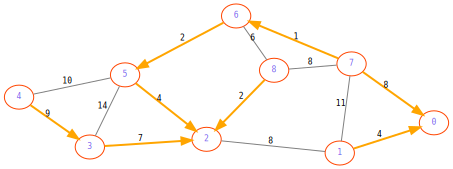

In [ ]:
prntK = g.KruskalMST()
adjlShow(g.getList(), weighted=True, path=prntK, simplepath=False)

-1 - 1: 0
1 - 2: 8
2 - 3: 7
3 - 4: 9
2 - 5: 4
5 - 6: 2
6 - 7: 1
2 - 8: 2
El conjunto de líneas de fibra óptica tendria un costo de:  33


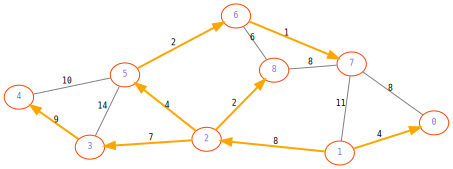

In [ ]:
prntP = g.PrimMST(1)
adjlShow(g.getList(), weighted=True, path=prntP)